Yuvraj Puri and Sam Fischer

**Introduction**

Representations of leadership ("images") are prominent in discourse about leadership and leadership education. However, the image itself was rarely explored. Prior to 2012, the only study was of two photographs of a CEO (Guthy and Jackson, 2008). Maxwell and Greenhalgh's study of images of leadership submitted by each student in each class of wharton undergraduates from the year 2000 to present made the "image" of leadership more tangible and empirical (Maxwell and Greenhalgh, 2011; Greenhalgh and Maxwell, 2019). While the 2019 study had elements of natural language processing, NLP has contiued to advance. Likewise, despite having a large directory of actual images the study didn't leverage any computer vision techniques.

Maxwell and Greenhalgh asked their students to each submit an image which represented the essence of leadership and to submit a brief essay explaining their choice. Image based methods of business instruction are seen as valuable prompts for students to, through commentary and discussion, make explicit thier implicit theories of leadership (Cairns-Lee, 2015).

One surprising element of the analysis of images of leadership was convergance: common images arose across individuals and class years. Martin Luther King Jr., is one popular and perennial example.

The pedagogical approach to business education which generated this assignment over 20 years ago is constructivist. It says that each student constructs reality and surfacing their construction can help them revise it. This framework would tell us that although a picture can speak a thousand words, the words that it "speaks" to each student are unique.

In this assignment, we aim to test that assumption. We ask if NLP can help us understand whether students who submit the same photos have converged on the same ideas in their essays. We hypothesize that while the essays of the same photos will be divergent because we suppose that what a student has to say about an image is less about the image, and more about their own individual experience.

While physical images of leadership have been used to raise implicit beliefs about leadership, it's our hope that our study can help us become more aware of the implicit assumptions we have about the people who use those images, and what they must or may mean to them. In that this study could re-affirm the three key principals of constructivist approaches to education (the individuality of the person, the self-awareness of the interlocutor, and their dialogic process) we believe it will be a valuable contribution in general.

Finally, we also predict that different meanings ascribed to the same image will not be cleanly separated by a gender binary. That is, if there are two general streams of meaning about an image, we do not expect it to be the case that the men will sort into one meaning and the women to another.   

Stated plainly, here are our hypotheses:

1. The same image can have different semantic meanings to different people.
2. Elements of identity (e.g. Gender) do not fully account for these semantic differences

And here is our data: ~300 images and essays responding to the topic "what is your image of leadership" from the 2023 Wharton freshman class

And here is our method:

**Data Pre-processing:**
1. We have a database of essays
2. We have a database of images labeled with essay IDs
3. We need to pre-process the essay data to remove unintended text e.g. links

**Image classfication**
1. We have lists of common images, e.g. the essay IDs for MLK essays and the essay IDs for generic image of cartoon man leading group up hill with flag (see (a) and (b) in appendix).


**Text Classification: Overview**

We introduce our plans for text classfication in theory before we specify a few experiments in practice.

In order to test our hypothesis, we will need to create semantic classes for each document. This will be unsupervised as we do not have classes a-priori. Therefore, we approach this problem as unsupervised learning, where documents will be given embeddings, and then clustered into discrete groups. Our goal is to see if the AI can pick up on common topics in the literature, such as agenic leadership essays vs essays which focus on communal characteristics.

We prefere unsupervised clustering to one-shot classification not only because of the assignment, but also because clustering implies that documents are rendered as embeddings in multiple dimensions where they can share similarities and differences with other documents on a continuous scale. This aligns with our goal is to explore semantic variance in an unsupervised manner.  

While Natural Language Processing has evolved such that it can accept raw text for artificial intelligence--we could submit these essays to ChatGPT4 with the prompt of classifying them, written in plain english--for the sake of the assignment and greater investigative creativity and reproducability, we will pass these documents onto our AI model as vector- or matrix-represented document embeddings.

This outlines our three subtasks: (1) evaluating the unsupervised learning clustering (2) designing of a NLP model for unsupervised learning on our dataset (3) designing an encoding scheme for our documents to feed to an NLP model.

**Text Classification Task (1): Evaluating Unsupervised Learning Clustering**

We begin by identifying how we will evaluate our clustering.

*Tree Based Methods*

Since our task is unsupervised--we need clustering algorithms which can be easily inspected. Tree-based methods produce dendograms, highly interpretable visual representations of clusters, and therefore these are prioritized.

However, tree based methods have disadvantages: they assume there is heirarchical clustering. This may not be true at any important level of depth. For example, breaking images of leadership down into agenic and non-agenic representations which then break down further into agenic/communal, agenic/non-communal, non-agenic/communal, and non-agenic/non-communal representations may not be useful. It would be more intuitive to think non-heirarchically: these narratives are communal, these are agenic, and some narratives may share membership in both.

*Parallel Coordinates*

Parallel coordinates would then appear as an appealing candidate. Parallal coordinates display the univariate distributions of the data along each dimension. This would allow us to see clustering along the "communal" and "agenic" axis as a hypothetical example. However, it also allows us to trace connections across dimensions. That is, we can see if there are narratives which are usually "communal and agenic" as well as ones that are "non-communal and non-agenic." Parallel coordinates preserves the benefit of hierarchical clustering (exploring combinations of features) without being tied to it.

*Gaussian Mixture Model (GMM)*

Since we will have vector embeddings for the narratives, it will be straightforward for us to plot the distributions of the feature-space of the embeddings and see if it is indeed roughly gaussian. If it is, a GMM would be advantageous as it could let us see those essays which are clearly divergent in themes or topics as opposed to those whose probabilty of membership overlap.

*K-Means Clustering*

We consider one last approach: restricting the NLP-encoded output to be three dimensional and applying k-means clustering to the three dimensional space. This lends itself to direct visualization in an animated 3-d plot, has the potential to be quite beautiful, and runs quickly. The cost to implement is low, and the amount we'd probably learn is great. We consider this an important method for learning more about the distribution of our data.

*Confusion Matrices*
While we don't have the benefit of hand-labels, we can look for patterns in clustering by using confusion matrices. A confusion matrix can help us see if the tree based algorithms which used BERT as opposed to doc2vec created similar or dissimilar clusters.

**Text Classification Task (2/3): Emedding to Encoding: NLP Models**

Since we need to create embeddings which are at the document level, using [doc2vec](https://radimrehurek.com/gensim/models/doc2vec.html) makes sense. While doc2vec is an extension of word2vec it is more than a bag of words approach. Python implementations of doc2vec can use "distributed memory" to take into account the meaning of words around a word within a document while creating semantic embeddings for the document. Because it is unsupervised, it seems useful for our purposes. Indeed, papers from 2018 found it was useful [at just this](https://ieeexplore.ieee.org/abstract/document/8489513).

However, that model is 6 years old, which suggests better approaches could exist. Indeed--what we like about doc2vec (contextual understandings of words) is a key part of BERTs and many other transformers. Sentence Transformers or [SBERTs](https://www.sbert.net/) allow us to leverage large, pre-trained, language models to create embeddings for sentences or documents that leverage each words meaning in context. While there have been critiques of [BERT embeddings](https://arxiv.org/abs/2011.05864) for unsupervised tasks, it seems worth it to us to experiment, especially when there are published guides for [model selection](https://www.sbert.net/docs/sentence_transformer/pretrained_models.html). Indeed, given the prior link, all-MiniLM-L6-v2 seems like a great model for us. It is small, quick, and has good all around performance.

By the standards of time we've just discussed, our last tool would be ancient. But it might prove useful. In it's python [implementation](https://scikit-learn.org/1.5/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html), we really only need one parameter to run Latent Dirichlet Allocation: the number of topics we'd like it to identify. While the output is discrete (a topic) rather than continuous and therefore not fit for clustering, it could be useful to us as a contrast layet for our cluster visualizations. We could see if our dendogram creates clusters that are akin to what our LDA creates, and do the same with our parallel lines and leader cluster as well.

**Data Processing**

Below we clean data, removing nuisance characters like links from the narrative which do not contribute to semantic meaning but would otherwise be tokenized.

In [1]:
import requests
import os
from zipfile import ZipFile

In [2]:
import pandas as pd
import numpy as np

In [3]:
from google.colab import files

uploaded = files.upload()

Saving simple_text.csv to simple_text.csv


In [5]:
df = pd.read_csv("simple_text.csv")

In [6]:
import re

def process_text2(text):
    # Remove leading/trailing spaces and newlines
    cleaned_text = text.strip()

    # Define a series of hyperlink patterns for a citation
    # If a website was linked, we aren't going to include this hyperlink
    # in the processed text
    hyperlink_pattern = r'(http[s]?://|www\.|\.com|\.org|\.net|\.edu|\.gov)'

    # Check if there is a hyperlink in the cleaned text
    if re.search(hyperlink_pattern, cleaned_text):

        # Handle hyperlinks in the text
        if '\n' in cleaned_text:
            # Split at the last \n
            last_newline_index = cleaned_text.rfind('\n')

            # Check if hyperlink is before or after the last \n
            if re.search(hyperlink_pattern, cleaned_text[last_newline_index:]):
                # If hyperlink is after the last newline, keep only text before it
                cleaned_text = cleaned_text[:last_newline_index]
            elif re.search(hyperlink_pattern, cleaned_text[:last_newline_index]):
                # If hyperlink is before the first \n, keep only text after it
                cleaned_text = cleaned_text[last_newline_index + 1:]
        else:
            # If no \n is found but there’s a hyperlink, remove the word containing the hyperlink
            words = cleaned_text.split()
            cleaned_text = ' '.join(word for word in words if not re.search(hyperlink_pattern, word))

    # Step 3: Replace escape characters and excess whitespace
    cleaned_text = cleaned_text.replace('\n', ' ').replace('\xa0', ' ')
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()

    return cleaned_text


Here is an example of some nuisance text--the copyright and url at the end of the essay

In [7]:
df.submission_text[140]

'I believe this picture captures the essence of leadership because being a leader cannot be done alone. In this picture, the leader is the one in charge of the direction of where they are going and is making the big decisions. However, without the other members who are rowing, the boat would never get to their destination. I think it is important to acknowledge that leadership means that you look out for your team and take charge but also continue to rely on them to get to the desired outcome. This also gives the leader a sense of humility which is crucial. In addition, the leader here directing the boat also has to communicate with the rowers in order to reach their destination. Open communication is essential when you are a leader because you have to take into consideration the needs, desires, and capabilities of the whole group. For example, the leader of the boat would need to take into consideration if the rowers need a break and adjust his plans accordingly. Therefore a leader wh

Our Pre-process can get rid of the url--this particular case is a nuisance where the copyright is difficult to remove. Shows a limitation in data quality.

In [ ]:
print(process_text2(df.submission_text[140]))

I believe this picture captures the essence of leadership because being a leader cannot be done alone. In this picture, the leader is the one in charge of the direction of where they are going and is making the big decisions. However, without the other members who are rowing, the boat would never get to their destination. I think it is important to acknowledge that leadership means that you look out for your team and take charge but also continue to rely on them to get to the desired outcome. This also gives the leader a sense of humility which is crucial. In addition, the leader here directing the boat also has to communicate with the rowers in order to reach their destination. Open communication is essential when you are a leader because you have to take into consideration the needs, desires, and capabilities of the whole group. For example, the leader of the boat would need to take into consideration if the rowers need a break and adjust his plans accordingly. Therefore a leader who

In [8]:
df["processed_text"] = df["submission_text"].apply(process_text2)


**Let's Make Embeddings**

With the data processed we proceed with our embeddings.

*Doc2Vec Embeddings*



In [10]:
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [11]:
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(common_texts)]
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

In [12]:
embeddings = []
for i in df["processed_text"]:
   embeddings.append([model.infer_vector(list(i))])

In [13]:
df["doc2vec_embeddings"] = embeddings

*Sentence BERT Embeddings*

In [14]:
from sentence_transformers import SentenceTransformer

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [15]:
model = SentenceTransformer("all-MiniLM-L6-v2")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [16]:
embeddings = model.encode(df["processed_text"])

In [17]:
df["bert_embeddings"] = list(embeddings)

*Latent Dirichlet Allocation*

In [18]:
from sklearn.decomposition import LatentDirichletAllocation

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

documents = df["processed_text"]
no_features = 1000

tf_vectorizer = CountVectorizer(max_df=0.95,
                                min_df=2,
                                max_features=no_features,
                                stop_words="english")
tf = tf_vectorizer.fit_transform(documents)

In [21]:
n_components = 3

In [22]:
lda = LatentDirichletAllocation(
    n_components=n_components,
    max_iter=5,
    learning_method="online",
    learning_offset=50.0,
    random_state=0,
)

In [23]:
lda.fit(tf)

LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=5, n_components=3, random_state=0)

In [24]:
test = tf.toarray() @ np.transpose(lda.components_)

In [25]:
df["lda_e1"] = test[:,0]
df["lda_e2"] = test[:,1]
df["lda_e3"] = test[:,2]

In [29]:
print(df["lda_e1"].mean())
print(df["lda_e2"].mean())
print(df["lda_e3"].mean())

2480.4135478410594
200.24892367376972
65.98827684776734


Our topics had decreasing relevance. Interesting.

# **Clustering**

With our three embedding strategies in hand we proceed to our clustering methods.

*Normally distributed data?*

Let's go find out if GMM is a good approach

In [329]:
X = np.array(df["doc2vec_embeddings"].values.tolist())[:,0,:]

In [322]:
import seaborn as sns
import matplotlib.pyplot as plt

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
       [<Axes: title={'center': '2'}>, <Axes: title={'center': '3'}>],
       [<Axes: title={'center': '4'}>, <Axes: >]], dtype=object)

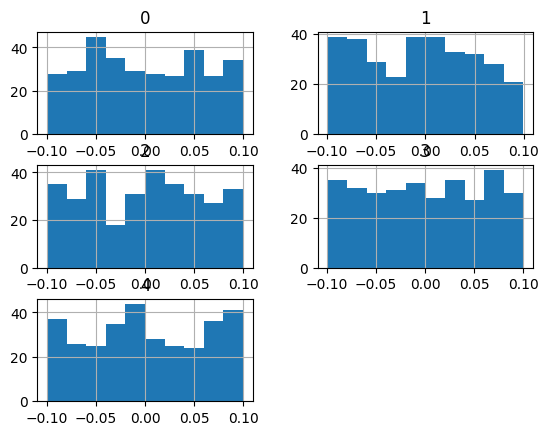

In [331]:
pd.DataFrame(X).hist()

Doc2Vec is not a good candidate.... let's check out an ICA reduction (assuming there are signals driving traffic so to speak) of bert...

In [337]:
X = np.array(df["bert_embeddings"].values.tolist())

In [338]:
from sklearn.decomposition import FastICA
ica = FastICA(n_components=3)
S_bert = ica.fit_transform(X)

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
       [<Axes: title={'center': '2'}>, <Axes: >]], dtype=object)

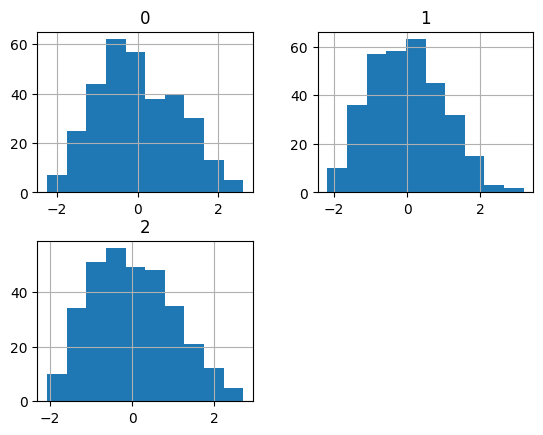

In [339]:
pd.DataFrame(S_bert).hist()

That does look promising!

Now let's check LDA

In [335]:
X = np.array(df[["lda_e1","lda_e2","lda_e3"]].values.tolist())
X_cs = (X - X.mean(axis=0)) / X.std(axis=0)

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
       [<Axes: title={'center': '2'}>, <Axes: >]], dtype=object)

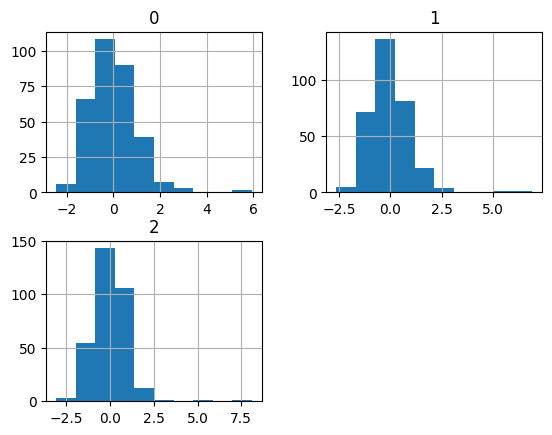

In [336]:
pd.DataFrame(X_cs).hist()

This also might work. Neat.

Let's do ICA bert and store results for later.

In [348]:
import numpy as np
from sklearn.mixture import GaussianMixture
X = S_bert
gm = GaussianMixture(n_components=3, random_state=0).fit(X)
print(gm.means_)
print(gm.aic(X)) #AIC is a little high eh...
keep = gm.fit_predict(X)


[[-0.49110349 -0.29788519 -0.86950628]
 [-0.14068516 -0.40525807  0.78609639]
 [ 0.65480163  0.81274007 -0.18530336]]
2697.2346602856996


Now let's LDA GMM and store results for later

In [349]:
import numpy as np
from sklearn.mixture import GaussianMixture
X = X_cs
gm = GaussianMixture(n_components=3, random_state=0).fit(X)
print(gm.means_)
print(gm.aic(X)) #AIC is a little high eh...
keep2 = gm.fit_predict(X)

[[ 0.90177643  1.36817393  1.04948533]
 [-0.68054183 -0.67745677 -0.69354568]
 [ 0.35037807  0.31506833  0.34772132]]
1085.088005331316


OOh the AIC went down that's promising. let's continue on and return to this at the end.

*Tree based clustering - Doc 2 Vec*

We start with a visual inspection of a dendogram for Doc2Vec

In [31]:
import plotly.figure_factory as ff
import numpy as np
np.random.seed(1)

In [110]:
X = np.array(df["doc2vec_embeddings"].values.tolist())[:,0,:]
Y = np.array(df["essay_id"])

In [33]:
labels = df["essay_id"].tolist()

In [34]:
fig = ff.create_dendrogram(X)
fig.update_layout(width=800, height=500)
fig.show()

The result is very pretty, but there are so many leaves we can't really visually inspect the branches. We also don't need many topic branches. Therefore we try again and cut the tree earlier.

In [35]:
import numpy as np
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

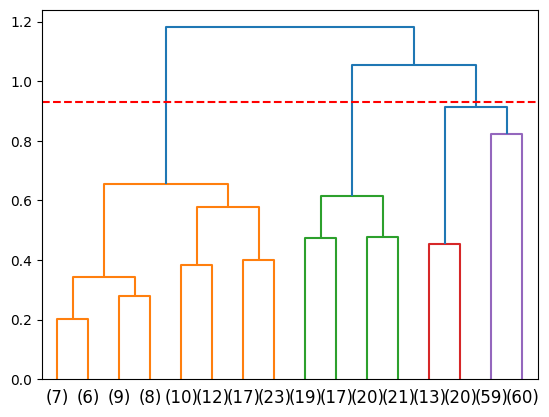

In [111]:
Z = hierarchy.linkage(X, 'ward')
plt.figure()
dn = hierarchy.dendrogram(Z, truncate_mode = 'level', p = 3)
plt.axhline(y=0.93, color='r', linestyle='--', label=f'Threshold: {0.93}')
plt.show()

Looking at this chart, it appears as though a point of distance that separates the dendogram into three subtrees is at 0.93. So we cut there and see what our resulting tree looks like.

We gather up the leaves from our tree...

In [112]:
leaf=hierarchy.leaves_list(Z)

In [113]:
from scipy.cluster.hierarchy import fcluster

max_d = .93

cluster_assignments = fcluster(Z, max_d, criterion='distance')

# Group labels by their cluster IDs
clusters = {}
for label, cluster_id in zip(labels, cluster_assignments):
    clusters.setdefault(cluster_id, []).append(label)

# Print clusters and their corresponding essay_id labels
for cluster_id, members in clusters.items():
    print(f"Cluster {cluster_id}: {members}")



Cluster 2: [18241, 18237, 18230, 18225, 18220, 18218, 18211, 18208, 18198, 18190, 18145, 18141, 18130, 18121, 18120, 18119, 18114, 18105, 18100, 18026, 18025, 17946, 17939, 17937, 17930, 17928, 17924, 17917, 17916, 17913, 17900, 17839, 17838, 17830, 17810, 17805, 17802, 17751, 17735, 17734, 17709, 18239, 18238, 18234, 18222, 18212, 18207, 18199, 18155, 18139, 18138, 18137, 18129, 18111, 18099, 18041, 18020, 18016, 18013, 18003, 18000, 17997, 17942, 17934, 17933, 17920, 17919, 17914, 17906, 17903, 17836, 17826, 17808, 17798, 17730, 17725, 17708]
Cluster 3: [18240, 18236, 18229, 18227, 18226, 18221, 18217, 18203, 18200, 18193, 18192, 18189, 18153, 18150, 18146, 18142, 18135, 18127, 18124, 18118, 18117, 18110, 18108, 18107, 18101, 18040, 18037, 18034, 18031, 18030, 18028, 18024, 18021, 18018, 18017, 18015, 18014, 18012, 18010, 18008, 18007, 18005, 18001, 17996, 17995, 17940, 17938, 17935, 17929, 17923, 17922, 17910, 17908, 17907, 17902, 17901, 17899, 17837, 17831, 17824, 17820, 17814, 178

What kinds of narratives were in these clusters?

In [97]:
print("----cluster 1-----")
print(df[df["essay_id"] == 18233]["processed_text"].values)
print(df[df["essay_id"] == 18210]["processed_text"].values)
print("tag: communalism")

print("----cluster 2-----")
print(df[df["essay_id"] == 18241]["processed_text"].values)
print(df[df["essay_id"] == 18237]["processed_text"].values)
print("tag: directing")

print("----cluster 3-----")
print(df[df["essay_id"] == 18240]["processed_text"].values)
print(df[df["essay_id"] == 18236]["processed_text"].values)
print("tag: vision and guide")

----cluster 1-----
['There is a common misconception that leaders stand alone — that they stand ahead everyone else as in they lead the crowd. However, the most effective leader is one who leads from within the masses. A true leader is someone who is able to hold up the hands of his or her counterparts, instilling a feeling of camaraderie, safety, and reliability amongst those he or she is around. Someone who is grounded with compassion and understanding for the day-to-day routine and struggles that the everyday person experiences resonates more deeply with people over someone who is detached. A good leader uplifts those that they lead, striving to better their experiences and make a real difference while also listening to others’ needs. A great leader does all of this from within']
["This image captures the essence of leadership by showcasing qualities that a leader radiates. The leader's attentive posture and engagement with the team exemplifies empathy and genuine concern for her su

A cursory glance suggests these categories hold up.

Now let's go find out where our MLK essays have been clustered, as well as the ones with the identical images...


**SAME PICTURE EXAMINATION**

We start by providing the IDs for the images of MLK and the cartoon mountain flag leader.

In [46]:
mlk_ids = [17714, 17997, 18004, 18209, 18239]
# IDs of essays that used pics of MLK

samepic_ids = [18225, 18211, 18208, 18197, 18194, 18190, 18150, 18145, 18105, 18107, 18008, 18009, 18000, 17951, 17930, 17901, 17738, 17719, 17715]
# IDs of essays that have submitted the same cartoon picture


We now look for them in our dendogram

In [47]:
# For Dendrogram based on doc2vec
# Finding the clusters that have the MLK pics

# Dictionary to store the clusters that contain the specific IDs
clu_with_eid = {essay_id: None for essay_id in mlk_ids}

# Iterate through the clusters
for cluster_id, members in clusters.items():
    for essay_id in mlk_ids:
        if essay_id in members:
            clu_with_eid[essay_id] = cluster_id

# Dictionary to group essay IDs by clusters

id_by_clu = {}

# Populate the dictionaries that show which clusters have which essay_ids.
for essay_id, cluster_id in clu_with_eid.items():
    if cluster_id not in id_by_clu:
        id_by_clu[cluster_id] = []
    id_by_clu[cluster_id].append(essay_id)

# Display the clusters and their associated essay IDs
for cluster_id, essay_ids in sorted(id_by_clu.items()):
    print(f"Cluster {cluster_id} has these essay IDs: {essay_ids}")

Cluster 1 has these essay IDs: [18209]
Cluster 2 has these essay IDs: [17997, 18239]
Cluster 3 has these essay IDs: [17714, 18004]


We see MLK is spread out among clusters 1, 2, and 3. A vote for communalism. A vote for directing. And a vote for vision. Let's read the essays shall we?

In [98]:
print("----cluster 1-----")
print(df[df["essay_id"] == 18209]["processed_text"].values)
print("tag: communalism ???? Perhaps a good fit, bringing others forward")

print("----cluster 2-----")
print(df[df["essay_id"] == 17997]["processed_text"].values)
print(df[df["essay_id"] == 18239]["processed_text"].values)
print("tag: directing ???? Perhaps, leading by example?")

print("----cluster 3-----")
print(df[df["essay_id"] == 17714]["processed_text"].values)
print(df[df["essay_id"] == 18004]["processed_text"].values)
print("tag: vision and guide ???? Perhaps, goals and power? The motivator?")

----cluster 1-----
['The essence of leadership is when a person can communicate and rally a group of people, regardless of scale. From a leader in a group project to a President, leadership is displayed by those who can facilitate and help bring others forward in uncomfortable situations. A leader has to be bold, not necessarily the loudest, but someone who can get their message across to others, thus encouraging them. Confidence must always be shown, even when the leader themself has their own doubts. A leader must also be reliable; when people rely on you, you must bring forth what the people want. Most of all, a leader must care. This means the leader must prioritize their role and embrace the sacrifice that comes with the role. A leader must trudge through adversity if it means losing sleep, suffering, and being uncomfortable overall.']
tag: communalism
----cluster 2-----
['This image of Martin Luther King, Jr., at the Lincoln Memorial, taken on August 28, 1963, exactly 60 years ag

We can see that although the dendogram sorted the essays into different branches it's not totally clear why. I'm not sure that's how I would have sorted these five essays although I agree they do touch on different aspects.

Let's check out some representatives from the cartoon images.

In [99]:
# All ids of the essays that have submitted the same picture

# Dictionary to store the clusters that contain the specific IDs
clu_with_eid = {essay_id: None for essay_id in samepic_ids}

# Iterate through the clusters
for cluster_id, members in clusters.items():
    for essay_id in samepic_ids:
        if essay_id in members:
            clu_with_eid[essay_id] = cluster_id

# Dictionary to group essay IDs by clusters

id_by_clu = {}

# Populate the dictionaries that show which clusters have which essay_ids.
for essay_id, cluster_id in clu_with_eid.items():
    if cluster_id not in id_by_clu:
        id_by_clu[cluster_id] = []
    id_by_clu[cluster_id].append(essay_id)

# Display the clusters and their associated essay IDs
for cluster_id, essay_ids in sorted(id_by_clu.items()):
    print(f"Cluster {cluster_id} has these essay IDs: {essay_ids}")

Cluster 1 has these essay IDs: [18197, 17951]
Cluster 2 has these essay IDs: [18225, 18211, 18208, 18190, 18145, 18105, 18000, 17930]
Cluster 3 has these essay IDs: [18194, 18150, 18107, 18008, 18009, 17901, 17738, 17719, 17715]


Let's check out these narratives

In [100]:
print("----cluster 1-----")
print(df[df["essay_id"] == 18197]["processed_text"].values)
print("tag: communalism ???? Mix of vision, but strong ending on communalism?")

print("----cluster 2-----")
print(df[df["essay_id"] == 18225]["processed_text"].values)
print(df[df["essay_id"] == 18211]["processed_text"].values)
print("tag: directing ???? I'm wondering if 'not' was not picked up as negating by doc2vec!!")

print("----cluster 3-----")
print(df[df["essay_id"] == 18194]["processed_text"].values)
print(df[df["essay_id"] == 18150]["processed_text"].values)
print("tag: vision and guide ???? This seems like a good fit, but other narratives mention these themes...")

----cluster 1-----
['Leadership is using your skills and knowledge to reach your goals while influencing and guiding others to reach their goals as well. A leader inspires, empowers, and guides their team towards success through communication and determination. In the image, the "leader" carries the flag, because he has useful knowledge and ideas to share with his team members, and he has taken the initiative to lead his team to their goal. The image really captures my understanding of leadership because it shows the "leader" also looking back and holding hands with the team meaning he is determined to make not just himself, but everyone else be the best versions of themselves so that everyone grows, learns, and achieves their goals. Leaders like the one in the image make sure their teammates are not left behind.']
tag: communalism ???? Perhaps a good fit, bringing others forward
----cluster 2-----
['To me, leadership is the ability to influence and be an uplifting power. Leadership re

Again, I see distinct meanings--someone notices the little girl, while the other focuses on the leader in front. However, I'm not sure the distinctions are so meaningful because the image itself is a characature of leadership--it's like what you would get if you googled for clip art of leadership.

That felt fairly useful. Does BERT make better distinctions? It's supposed to be very advanced...

*Tree based clustering BERT*

In [114]:
X = np.array(df["bert_embeddings"].values.tolist())

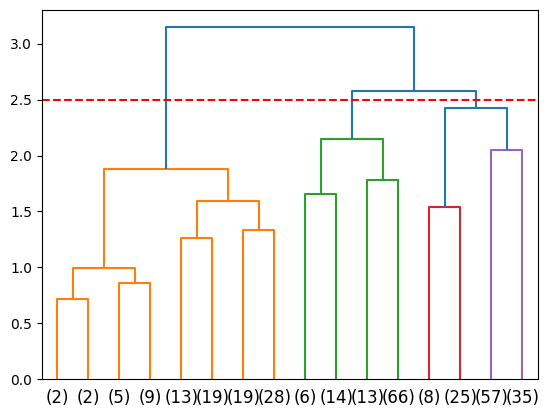

In [115]:
Z = hierarchy.linkage(X, 'ward')
plt.figure()
dn = hierarchy.dendrogram(Z, truncate_mode = 'level', p = 3)
plt.axhline(y=2.5, color='r', linestyle='--')
plt.show()

We visualize our dendogram with our cut point to produce three distinct clusters.

In [116]:
max_d = 2.5

cluster_assignments = fcluster(Z, max_d, criterion='distance')

# Group labels by their cluster IDs
clusters_BERT = {}
for label, cluster_id in zip(labels, cluster_assignments):
    clusters_BERT.setdefault(cluster_id, []).append(label)

# Print clusters and their corresponding essay_id labels
for cluster_id, members in clusters_BERT.items():
    print(f"Cluster {cluster_id}: {members}")


Cluster 2: [18241, 18230, 18229, 18202, 18200, 18197, 18193, 18190, 18188, 18150, 18149, 18145, 18144, 18121, 18117, 18115, 18110, 18108, 18107, 18105, 18101, 18024, 18021, 18014, 18010, 18008, 17998, 17948, 17946, 17943, 17940, 17938, 17937, 17924, 17917, 17912, 17907, 17901, 17840, 17838, 17831, 17823, 17801, 17799, 17747, 17745, 17738, 17733, 17721, 17710, 17709, 17705, 18238, 18231, 18219, 18213, 18212, 18207, 18206, 18201, 18199, 18137, 18133, 18129, 18122, 18099, 18041, 18039, 18038, 18032, 18029, 18016, 18011, 18009, 18002, 17999, 17994, 17953, 17951, 17941, 17933, 17931, 17915, 17836, 17826, 17818, 17800, 17798, 17794, 17792, 17790, 17782, 17746, 17744, 17730, 17729, 17727, 17725, 17699]
Cluster 1: [18240, 18236, 18233, 18226, 18225, 18221, 18220, 18211, 18208, 18203, 18192, 18154, 18148, 18147, 18142, 18141, 18130, 18127, 18124, 18123, 18120, 18119, 18118, 18114, 18035, 18034, 18030, 18023, 18019, 18017, 18012, 18005, 18001, 17996, 17995, 17939, 17930, 17928, 17922, 17916, 179

Before we read narratives, what's the confusion matrix like for these two?

In [170]:
data1 = {'data' : clusters[1] , 'd2v_cluster' : 1 }
data2 = {'data' : clusters[2] , 'd2v_cluster' : 2 }
data3 = {'data' : clusters[3] , 'd2v_cluster' : 3 }
data12 = {'data' : clusters_BERT[1] , 'b_cluster' : 1 }
data22 = {'data' : clusters_BERT[2] , 'b_cluster' : 2 }
data32 = {'data' : clusters_BERT[3] , 'b_cluster' : 3 }

In [171]:
temp = pd.DataFrame(data1)
for i in [data2,data3]:
  temp = pd.concat([temp,pd.DataFrame(i)])

In [172]:
result = pd.merge(df, temp, left_on='essay_id', right_on='data')

In [173]:
temp = pd.DataFrame(data12)
for i in [data22,data32]:
  temp = pd.concat([temp,pd.DataFrame(i)])

In [174]:
result = pd.merge(result, temp, left_on='essay_id', right_on='data')

In [177]:
pd.crosstab(result["d2v_cluster"],result["b_cluster"])

b_cluster,1,2,3
d2v_cluster,,,
1,31,27,34
2,22,27,28
3,44,45,63


Ok, let's maximize accuracy by assuming that a cluster of d2v should be matched with the cluster of b for which it shares the most membership. Therefore... 3<->3, and 1<->1 and therefore 2<->2 and the "accuracy" is along the diagonal and is about 38%. Not great! Looks like they are producing different clusters!

So this would make me guess that the clusters will be distinct. Let's see if we can pick up how...

In [182]:
print("----cluster 1-----")
print(df[df["essay_id"] == 18240]["processed_text"].values)
print(df[df["essay_id"] == 18236]["processed_text"].values)
print("tag: communalism ???? This still feels relevant")

print("----cluster 2-----")
print(df[df["essay_id"] == 18241]["processed_text"].values)
print(df[df["essay_id"] == 18230]["processed_text"].values)
print("tag: directing ???? This still feels relevant")

print("----cluster 3-----")
print(df[df["essay_id"] == 18237]["processed_text"].values)
print(df[df["essay_id"] == 18227]["processed_text"].values)
print("tag: Charity and abroad actually feels most relevant here...")

----cluster 1-----
['I chose an image of a group of individuals hiking up a mountain, where one individual takes initiative and leads the group in order to work towards a common goal. All of these people want to reach to the top of the mountain, but they need to work together in order to achieve this. Leadership can be shown in many different forms. I believe that a true leader takes the first step in order to inspire and motivate others. A leader has a clear agenda that will benefit the group as a whole, and has the ability to manage these individuals in a decisive and organized manner. Leaders recognize that clear communication within a group is what fuels success, empowering each other to work to the best of their abilities within a shared workspace.']
["This image of my older sister and I as children captures the essence of leadership to me because to me, a leader is someone that can understand others and accommodate to their needs. A good leader is able to understand the abilities

Interesting, the first cluster of communalism feels relevant. Directing feels relevant for the second. International leadership of a charitable sort feels most relevant for the third. I wonder how the MLK images split out. I don't think the mountain images would land in this third bucket.

And again, let's inspect membership for MLK

In [183]:
mlk_ids = [17714, 17997, 18004, 18209, 18239]
# IDs of essays that used pics of MLK

samepic_ids = [18225, 18211, 18208, 18197, 18194, 18190, 18150, 18145, 18105, 18107, 18008, 18009, 18000, 17951, 17930, 17901, 17738, 17719, 17715]
# IDs of essays that have submitted the same cartoon picture


In [184]:
# For Dendrogram based on BERT
# Finding the clusters that have the MLK pics

# Dictionary to store the clusters that contain the specific IDs
clu_with_eid = {essay_id: None for essay_id in mlk_ids}

# Iterate through the clusters
for cluster_id, members in clusters_BERT.items():
    for essay_id in mlk_ids:
        if essay_id in members:
            clu_with_eid[essay_id] = cluster_id

# Dictionary to group essay IDs by clusters

id_by_clu = {}

# Populate the dictionaries that show which clusters have which essay_ids.
for essay_id, cluster_id in clu_with_eid.items():
    if cluster_id not in id_by_clu:
        id_by_clu[cluster_id] = []
    id_by_clu[cluster_id].append(essay_id)

# Display the clusters and their associated essay IDs
for cluster_id, essay_ids in sorted(id_by_clu.items()):
    print(f"Cluster {cluster_id} has these essay IDs: {essay_ids}")

Cluster 1 has these essay IDs: [18209]
Cluster 3 has these essay IDs: [17714, 17997, 18004, 18239]


When looking at the dendrogram constructed with BERT embeddings, it appears that the majority of the MLK leadership essays appear to fit into Subtree 3. Interestingly, the only essay that does not end up in Subtree 3 is the one that does NOT mention Martin Luther King by any moniker (i.e. no Dr. King, no MLK, no Martin Luther King Jr.). Wow--maybe BERT picked up who we were talking about! It kind of fits--cluster one could be generic communalism while cluster 3 could be larger international impact. That's really neat. Let's see if my assumptions about less cluster 3 for the mountain cartoon is right...

In [185]:
# For dendrogram based on BERT
# Finding the clusters that have the same cartoon pic

# Dictionary to store the clusters that contain the specific IDs
clu_with_eid = {essay_id: None for essay_id in samepic_ids}

# Iterate through the clusters
for cluster_id, members in clusters_BERT.items():
    for essay_id in samepic_ids:
        if essay_id in members:
            clu_with_eid[essay_id] = cluster_id

# Dictionary to group essay IDs by clusters

id_by_clu = {}

# Populate the dictionaries that show which clusters have which essay_ids.
for essay_id, cluster_id in clu_with_eid.items():
    if cluster_id not in id_by_clu:
        id_by_clu[cluster_id] = []
    id_by_clu[cluster_id].append(essay_id)

# Display the clusters and their associated essay IDs
for cluster_id, essay_ids in sorted(id_by_clu.items()):
    print(f"Cluster {cluster_id} has these essay IDs: {essay_ids}")

Cluster 1 has these essay IDs: [18225, 18211, 18208, 18194, 18000, 17930, 17719, 17715]
Cluster 2 has these essay IDs: [18197, 18190, 18150, 18145, 18105, 18107, 18008, 18009, 17951, 17901, 17738]


These essays which have the same cartoon pic are seemingly evenly spread out between clusters one and two. And how about that. None in cluster three. It looks like BERT picked up on some gradiosity, like a great charitable work of a leader. Wow that's interesting.



*Tree based LDA*

We recall the LDA produced unbalanced topic associations, so we're going to center and scale it

In [186]:
X = np.array(df[["lda_e1","lda_e2","lda_e3"]].values.tolist())

In [187]:
X_cs = (X - X.mean(axis=0)) / X.std(axis=0)

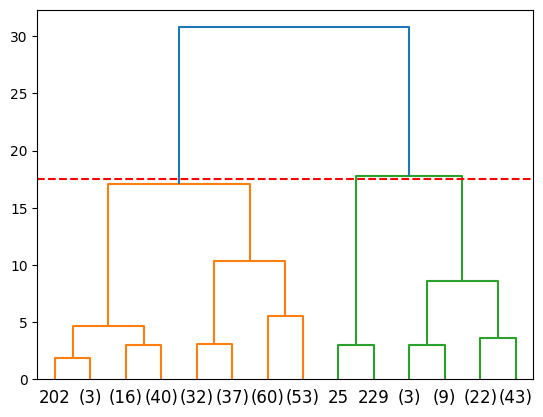

In [202]:
Z = hierarchy.linkage(X_cs, 'ward')
plt.figure()
dn = hierarchy.dendrogram(Z, truncate_mode = 'level', p = 3)
plt.axhline(y=17.5, color='r', linestyle='--')
plt.show()

In [203]:
max_d = 17.5

cluster_assignments = fcluster(Z, max_d, criterion='distance')

# Group labels by their cluster IDs
clusters_LDA = {}
for label, cluster_id in zip(labels, cluster_assignments):
    clusters_LDA.setdefault(cluster_id, []).append(label)

# Print clusters and their corresponding essay_id labels
for cluster_id, members in clusters_LDA.items():
    print(f"Cluster {cluster_id}: {members}")


Cluster 1: [18241, 18240, 18237, 18236, 18233, 18230, 18229, 18227, 18225, 18221, 18220, 18218, 18217, 18211, 18208, 18205, 18203, 18202, 18198, 18193, 18189, 18188, 18154, 18153, 18149, 18146, 18145, 18144, 18140, 18135, 18127, 18121, 18120, 18119, 18114, 18110, 18106, 18101, 18040, 18035, 18034, 18033, 18031, 18028, 18026, 18025, 18021, 18019, 18017, 18015, 18010, 18008, 18007, 18005, 18001, 17998, 17995, 17946, 17945, 17938, 17937, 17935, 17930, 17929, 17924, 17923, 17922, 17913, 17912, 17910, 17908, 17902, 17901, 17900, 17899, 17840, 17839, 17838, 17837, 17831, 17830, 17829, 17828, 17824, 17823, 17820, 17817, 17814, 17813, 17810, 17806, 17805, 17799, 17797, 17796, 17795, 17751, 17747, 17740, 17735, 17734, 17733, 17731, 17726, 17724, 17721, 17710, 17709, 17707, 17706, 17705, 18239, 18238, 18235, 18234, 18232, 18231, 18224, 18223, 18222, 18219, 18214, 18213, 18212, 18207, 18206, 18204, 18201, 18196, 18195, 18191, 18155, 18152, 18151, 18143, 18138, 18136, 18134, 18133, 18132, 18131, 1

In [206]:
data1 = {'data' : clusters_LDA[1] , 'lda_cluster' : 1 }
data2 = {'data' : clusters_LDA[2] , 'lda_cluster' : 2 }
data3 = {'data' : clusters_LDA[3] , 'lda_cluster' : 3 }

temp = pd.DataFrame(data1)
for i in [data2,data3]:
  temp = pd.concat([temp,pd.DataFrame(i)])

result = pd.merge(result, temp, left_on='essay_id', right_on='data')

MergeError: Passing 'suffixes' which cause duplicate columns {'data_x'} is not allowed.

In [207]:
pd.crosstab(result["d2v_cluster"],result["lda_cluster"])

lda_cluster,1,2,3
d2v_cluster,,,
1,69,0,23
2,63,1,13
3,110,1,41


Very asymetrical. Let's assume d2v 3 maps to LDA 1 and d2v 1 maps to LDA 3 and d2v 2 maps to LDA 2. Then we have 42% shared between LDA and d2v... let's check bert. It will probably be similar because of asymmetry..

In [211]:
pd.crosstab(result["b_cluster"],result["lda_cluster"])

lda_cluster,1,2,3
b_cluster,,,
1,56,0,41
2,74,2,23
3,112,0,13


About 48% accuracy. So actually LDA did decent at replicating what others found. Let's check out the narratives.

In [212]:
print("----cluster 1-----")
print(df[df["essay_id"] == 18240]["processed_text"].values)
print(df[df["essay_id"] == 18241]["processed_text"].values)
print("tag: directing...")

print("----cluster 2-----")
print(df[df["essay_id"] == 18190]["processed_text"].values)
print(df[df["essay_id"] == 17999]["processed_text"].values)
print("tag: compasssion ???")

print("----cluster 3-----")
print(df[df["essay_id"] == 18226]["processed_text"].values)
print(df[df["essay_id"] == 18210]["processed_text"].values)
print("tag: Communalism, definitely...")

----cluster 1-----
['I chose an image of a group of individuals hiking up a mountain, where one individual takes initiative and leads the group in order to work towards a common goal. All of these people want to reach to the top of the mountain, but they need to work together in order to achieve this. Leadership can be shown in many different forms. I believe that a true leader takes the first step in order to inspire and motivate others. A leader has a clear agenda that will benefit the group as a whole, and has the ability to manage these individuals in a decisive and organized manner. Leaders recognize that clear communication within a group is what fuels success, empowering each other to work to the best of their abilities within a shared workspace.']
['Leadership is influencing and directing others in pursuit of a common goal. The many sticky notes and side discussions occurring in the photo are steps toward the projects listed on the paper (“Community Garden,” “Immigrant Support,

Ok we're seeing similar themes percolate up. Communalism and connection and also directing. So we would guess MLK would come up in either 1 or 3 but not 2 statistically speaking, and most likely to be in 1 statistically.

In [213]:
# For Dendrogram based on LDA
# Finding the clusters that have the MLK pics

# Dictionary to store the clusters that contain the specific IDs
clu_with_eid = {essay_id: None for essay_id in mlk_ids}

# Iterate through the clusters
for cluster_id, members in clusters_LDA.items():
    for essay_id in mlk_ids:
        if essay_id in members:
            clu_with_eid[essay_id] = cluster_id

# Dictionary to group essay IDs by clusters

id_by_clu = {}

# Populate the dictionaries that show which clusters have which essay_ids.
for essay_id, cluster_id in clu_with_eid.items():
    if cluster_id not in id_by_clu:
        id_by_clu[cluster_id] = []
    id_by_clu[cluster_id].append(essay_id)

# Display the clusters and their associated essay IDs
for cluster_id, essay_ids in sorted(id_by_clu.items()):
    print(f"Cluster {cluster_id} has these essay IDs: {essay_ids}")

Cluster 1 has these essay IDs: [17714, 17997, 18004, 18239]
Cluster 3 has these essay IDs: [18209]


And that is just what we see.

Again, I'd expect cartoon to follow the distribution as well.. 3 then 1 then 2.

In [215]:
# For dendrogram based on LDA
# Finding the clusters that have the same cartoon pic

# Dictionary to store the clusters that contain the specific IDs
clu_with_eid = {essay_id: None for essay_id in samepic_ids}

# Iterate through the clusters
for cluster_id, members in clusters_LDA.items():
    for essay_id in samepic_ids:
        if essay_id in members:
            clu_with_eid[essay_id] = cluster_id

# Dictionary to group essay IDs by clusters

id_by_clu = {}

# Populate the dictionaries that show which clusters have which essay_ids.
for essay_id, cluster_id in clu_with_eid.items():
    if cluster_id not in id_by_clu:
        id_by_clu[cluster_id] = []
    id_by_clu[cluster_id].append(essay_id)

# Display the clusters and their associated essay IDs
for cluster_id, essay_ids in sorted(id_by_clu.items()):
    print(f"Cluster {cluster_id} has these essay IDs: {essay_ids}")

Cluster 1 has these essay IDs: [18225, 18211, 18208, 18145, 18008, 18009, 18000, 17930, 17901]
Cluster 2 has these essay IDs: [18190]
Cluster 3 has these essay IDs: [18197, 18194, 18150, 18105, 18107, 17951, 17738, 17719, 17715]


These look a little over-represented in cluster 3, which is the one about communalism. That's interesting and I wouldn't have expected it. Let's read one to learn more.

In [216]:
print("----cluster 3-----")
print(df[df["essay_id"] == 18197]["processed_text"].values)
print(df[df["essay_id"] == 18194]["processed_text"].values)
print("tag: Communalism, definitely...")

----cluster 3-----
['Leadership is using your skills and knowledge to reach your goals while influencing and guiding others to reach their goals as well. A leader inspires, empowers, and guides their team towards success through communication and determination. In the image, the "leader" carries the flag, because he has useful knowledge and ideas to share with his team members, and he has taken the initiative to lead his team to their goal. The image really captures my understanding of leadership because it shows the "leader" also looking back and holding hands with the team meaning he is determined to make not just himself, but everyone else be the best versions of themselves so that everyone grows, learns, and achieves their goals. Leaders like the one in the image make sure their teammates are not left behind.']
['This picture shows not only a person leading others and offering guidance but also a leader who remains united and connected with their team. In the picture, the man in fr

It does seem like both are about connections to team! Well done LDA! Surprisingly good show.

# Evaluating with Parallel Lines

*doc2vec parallel*

In [224]:
X = np.array(df["doc2vec_embeddings"].values.tolist())[:,0,:]

In [ ]:
import plotly.express as px
fig = px.parallel_coordinates(X)
fig.show()

I can see at least two stories: groups of lines which alternate up and down and opposite of one another. Perhaps also a scattereed group that runs right across. Does color make a difference?



In [ ]:
import plotly.express as px
fig = px.parallel_coordinates(X, color = result["d2v_cluster"])
fig.show()

A little! One can kind of make out clusters...

*BERT Parallel Lines*

In [228]:
X = np.array(df["bert_embeddings"].values.tolist())

In [229]:
X.shape

(321, 384)

BERT is way to big. Let's assume there are independent signals at work here and reduce this thing down with ICA. We chose ICA because we assume there should be signals driving the embeddings, those signals would be things like topics.

In [230]:
from sklearn.decomposition import FastICA

In [231]:
ica = FastICA(n_components=3)
S_ = ica.fit_transform(X)

In [220]:
import plotly.express as px
fig = px.parallel_coordinates(S_)
fig.show()

Not much..with color?

In [232]:
import plotly.express as px
fig = px.parallel_coordinates(S_,color=result["b_cluster"])
fig.show()

I'm seeing some clustering with 1 but not much...Will more signals help?

In [233]:
ica = FastICA(n_components=5)
S_ = ica.fit_transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning:

FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.



In [235]:
import plotly.express as px
fig = px.parallel_coordinates(S_)
fig.show()

I see some clumping not a ton of clustering..

And with color...

In [236]:
import plotly.express as px
fig = px.parallel_coordinates(S_,color=result["b_cluster"])
fig.show()

Three seems well clustered, but two seems to really go with it. Yet that would make sense, 3 was charity and grandoisity. Interesting.

In hindsight doc 2 vec did look better, maybe two opposite waves. Let's check out LDA

*LDA parallel lines*

In [237]:
X = np.array(df[["lda_e1","lda_e2","lda_e3"]].values.tolist())

In [238]:
X_cs = (X - X.mean(axis=0)) / X.std(axis=0)

In [239]:
import plotly.express as px
fig = px.parallel_coordinates(X_cs)
fig.show()

At first glance. There is really not a lot of clustering.  But adding on the LDA clusters could reveal something interesting.

In [241]:
import plotly.express as px
fig = px.parallel_coordinates(X_cs,color = result["lda_cluster"])
fig.show()

Neat--well the tree based approach was able to separate these LDA factors really well. Again, we saw some accuracy between LDA and other categories, particularly between an idea of leadership as connection, and maybe leaderhsip in a more authoritative or forward/outward manner. That's really cool.

# What can we learn about the data from Kmeans?

*Kmeans with Doc2Vec*

In [242]:
from sklearn.cluster import KMeans

In [243]:
import numpy as np

In [244]:
X = np.array(df["doc2vec_embeddings"].values.tolist())[:,0,:]

In [245]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
labelsK = kmeans.labels_
df['km'] = labelsK

Let's plot it up using umap

In [246]:
pip install umap-learn[plot]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 59.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 7.9 MB/s eta 0:00:00


In [247]:
import umap.umap_ as umap
import umap.plot

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning:


Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.


/usr/local/lib/python3.10/dist-packages/numba/np/ufunc/dufunc.py:343: NumbaWarning:

Compilation requested for previously compiled argument types ((uint32,)). This has no effect and perhaps indicates a bug in the calling code (compiling a ufunc more than once for the same signature

/usr/local/lib/python3.10/dist-packages/numba/np/ufunc/dufunc.py:343: NumbaWarning:

Compilation requested for previously compiled argument types ((uint32,)). This has no effect and perhaps indicates a bug in the calling code (compiling a ufunc more than once for the same signature

/usr/local/lib/python3.10/dist-packages/numba/np/ufunc/dufunc.py:343: NumbaWarning:

Compilation requested for previously compiled argument types (

In [248]:
mapper = umap.UMAP(random_state=42).fit(X)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



<Axes: >

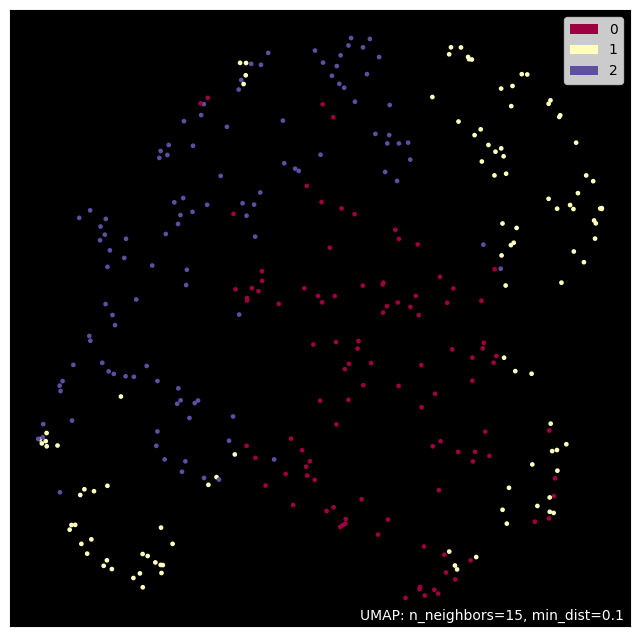

In [249]:
umap.plot.points(mapper, labels=df["km"], theme="viridis")

That's not bad--I want to try to find some structure




/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



<Axes: >

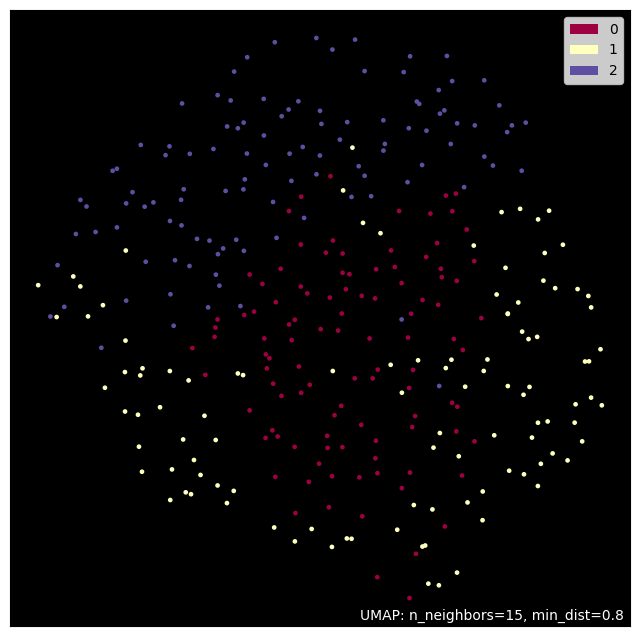

In [295]:
mapper = umap.UMAP(n_neighbors=15, min_dist = .80, random_state=1).fit(X)
umap.plot.points(mapper, labels=df["km"], theme="viridis")

After many iterations of neighbors and distances this is a consistant pattern I see: one of the classes is wrapped around by the other two, and also penetrates one of those wrapping layers. Now to interpret this a little bit we should ask how KM compares to our other labels...

In [297]:
pd.crosstab(df["km"],result["d2v_cluster"])

d2v_cluster,1,2,3
km,,,
0,28,69,8
1,62,4,41
2,2,4,103


There we go--so when we see KM 2 > D2V 3, KM 0 > D2V 2, and KM 1 > D2V > 1.

So Communalism (KM 1), Directing (KM 0), Vision and Guide (KM 2). Huh. We see 1 (communalism) pretty broken up by 0 (directing). I wouldn't have thought that. I thought directing would interfere more with vision and guide... Maybe some folks write both, or the essays about one or the other (being about the effects on people?) are connected in a bow approach... although again this doc2vec has some "attention" like mechanisms.

**How Did GMM compare?**

In [352]:
df["gmm_bert"] = keep
df["gmm_lda"] = keep2

In [356]:
pd.crosstab(df["gmm_bert"],result["b_cluster"])

b_cluster,1,2,3
gmm_bert,,,
0,78,14,6
1,8,71,43
2,11,14,76


We see a lot of similarity, about 71% between GMM bert encodings and tree based bert encodings. But the 29% discrepancy would be good to investigate in the future. We honestly just ran out of time.

In [357]:
pd.crosstab(df["gmm_lda"],result["lda_cluster"])

lda_cluster,1,2,3
gmm_lda,,,
0,4,2,3
1,117,0,0
2,121,0,74


And here we see less agreement, about 60%, that's interesting because the AIC was lower for these LDA gmm models than for the bert GMM model. This would also be worth future investigating.

# Conclusions

While the investigation we've done is unsupervised, it helped us explore the data in a structured way. Namely, we saw across differnet encoding strategies and clustering methods that there were differences in writing about the same image--whether MLK or something more generic.

Our explorations also helped us understand our data better. We think we've found some legitimate semantic conecpts (leadership as connection, leadership as direction) as well as some interesting insights into what BERT can pick up (scale of leadership). LDA impressed us with its ability to make discrete topics, and UMAP seemed helpful in describing the relationship between the topics in the data. We see promise in using GMM in the future to push models further, perhaps aided with more hand-labeled data.

We both worked about 15-20 hours on this.